In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
import re
import os

In [3]:
anime = pd.read_csv('anime_Final.csv')
user = pd.read_csv('user_anime_list_Final.csv')

In [4]:
anime.head()

,anime_id,title,main_picture,alternative_titles,start_date,end_date,synopsis,num_list_users,num_scoring_users,nsfw,medium,status,num_episodes,start_season,source,average_episode_duration,studios,related_anime,recommendations,genres
0,1,Cowboy Bebop,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [], 'en': 'Cowboy Bebop', 'ja': '...",1998-04-03,1999-04-24,"Crime is timeless. By the year 2071, humanity ...",1731562,892212,white,tv,finished_airing,26,"{'year': 1998, 'season': 'spring'}",original,1440,"[{'id': 14, 'name': 'Sunrise'}]","[{'anime_id': 5, 'relation': 'side_story'}, {'...","[{'anime_id': 205, 'num_recommendations': 118}...","['Action', 'Adult Cast', 'Award Winning', 'Sci..."
1,5,Cowboy Bebop: Tengoku no Tobira,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [""Cowboy Bebop: Knockin' on Heave...",2001-09-01,2001-09-01,"Another day, another bounty—such is the life o...",353984,202526,white,movie,finished_airing,1,"{'year': 2001, 'season': 'summer'}",original,6911,"[{'id': 4, 'name': 'Bones'}]","[{'anime_id': 1, 'relation': 'parent_story'}]","[{'anime_id': 4106, 'num_recommendations': 3},...","['Action', 'Adult Cast', 'Sci-Fi', 'Space']"
2,6,Trigun,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [], 'en': 'Trigun', 'ja': 'トライガン'}",1998-04-01,1998-09-30,"Vash the Stampede is the man with a $$60,000,0...",707864,347350,white,tv,finished_airing,26,"{'year': 1998, 'season': 'spring'}",manga,1480,"[{'id': 11, 'name': 'Madhouse'}]","[{'anime_id': 4106, 'relation': 'side_story'},...","[{'anime_id': 1, 'num_recommendations': 85}, {...","['Action', 'Adult Cast', 'Adventure', 'Sci-Fi'..."
3,7,Witch Hunter Robin,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': ['WHR'], 'en': 'Witch Hunter Robi...",2002-07-03,2002-12-25,Robin Sena is a powerful craft user drafted in...,110305,42443,white,tv,finished_airing,26,"{'year': 2002, 'season': 'summer'}",original,1500,"[{'id': 14, 'name': 'Sunrise'}]",[],"[{'anime_id': 2025, 'num_recommendations': 12}...","['Action', 'Detective', 'Drama', 'Mystery', 'S..."
4,8,Bouken Ou Beet,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': ['Adventure King Beet'], 'en': 'B...",2004-09-30,2005-09-29,It is the dark century and the people are suff...,14822,6353,white,tv,finished_airing,52,"{'year': 2004, 'season': 'fall'}",manga,1380,"[{'id': 18, 'name': 'Toei Animation'}]","[{'anime_id': 1123, 'relation': 'sequel'}]","[{'anime_id': 417, 'num_recommendations': 2}, ...","['Adventure', 'Fantasy', 'Shounen', 'Supernatu..."


In [ ]:
#anime.count()

In [67]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'colors': ['red', 'blue', 'green', 'red'],
    'values': [10, 20, 30, 40]
})

# use pivot_table() to group by 'id' and push 'colors' as columns
pivot = pd.pivot_table(df, index='id', columns='colors', values='values', aggfunc='sum')

# fill any missing values with 0
pivot = pivot.fillna(0)

In [63]:
dff = pd.DataFrame({
    'id': [1, 2, 3],
    'colors': ['red', 'blue', 'green']
})
dff

,id,colors
0,1,red
1,2,blue
2,3,green


In [66]:
dff = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'colors': ['red', 'blue', 'green', 'red'],
    'values': [10, 20, 30, 40]
})
dff

,id,colors,values
0,1,red,10
1,2,blue,20
2,3,green,30
3,4,red,40


In [68]:
pivot

colors,blue,green,red
id,,,
1,0.0,0.0,10.0
2,20.0,0.0,0.0
3,0.0,30.0,0.0
4,0.0,0.0,40.0


In [40]:
user_eda=user[user.score!=0]

In [73]:
#user_eda

In [43]:
statusScore=user_eda.groupby('status')['score'].value_counts()

In [70]:
xyz=user_eda.groupby('status')['score'].value_counts().reset_index(level=['status'])

In [93]:
xyz

,status,sc_count
score,,
8,completed,2636291
7,completed,2461022
9,completed,1630394
6,completed,1292655
10,completed,1098224
5,completed,648363
4,completed,280830
3,completed,144628
2,completed,83142


In [82]:
pivotxyz = pd.pivot_table(xyz, index='score', columns='status', values='sc_count', aggfunc='sum')

In [92]:
pivotxyz

status,completed,dropped,on_hold,plan_to_watch,watching,score
score,,,,,,
1,77896,26141,775,1235,1777,1
2,83142,22940,983,263,1193,2
3,144628,33378,1353,278,1704,3
4,280830,57123,3294,462,3484,4
5,648363,73504,9535,2295,8910,5
6,1292655,51589,20318,3230,21330,6
7,2461022,25625,33024,7540,47206,7
8,2636291,8076,24117,6028,51268,8
9,1630394,2302,9637,4385,34410,9


In [91]:
pivotxyz['score']=range(1,len(pivotxyz)+1)

In [80]:
xyz.rename(columns={'score':'sc_count'},inplace=True)

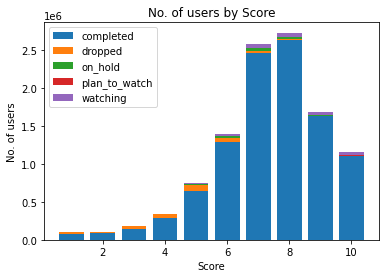

In [104]:
plt.figure(figsize=(6,4))
plt.bar(pivotxyz['score'], pivotxyz['completed'], label='completed')
plt.bar(pivotxyz['score'], pivotxyz['dropped'], bottom=pivotxyz['completed'], label='dropped')
plt.bar(pivotxyz['score'], pivotxyz['on_hold'], bottom=pivotxyz['completed']+pivotxyz['dropped'], label='on_hold')
plt.bar(pivotxyz['score'], pivotxyz['plan_to_watch'], bottom=pivotxyz['completed']+pivotxyz['dropped']+pivotxyz['on_hold'], label='plan_to_watch')
plt.bar(pivotxyz['score'], pivotxyz['watching'], bottom=pivotxyz['completed']+pivotxyz['dropped']+pivotxyz['on_hold']+pivotxyz['plan_to_watch'], label='watching')

# add labels and titles

plt.xlabel('Score')
plt.ylabel('No. of users')
plt.title('No. of users by Score')
plt.legend()

# display the plot
plt.show()

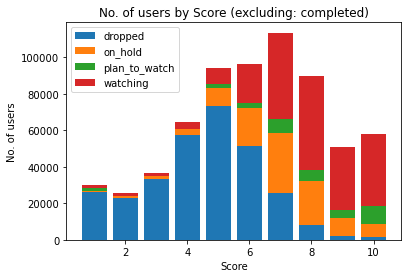

In [103]:
plt.figure(figsize=(6,4))
plt.bar(pivotxyz['score'], pivotxyz['dropped'], label='dropped')
plt.bar(pivotxyz['score'], pivotxyz['on_hold'], bottom=pivotxyz['dropped'], label='on_hold')
plt.bar(pivotxyz['score'], pivotxyz['plan_to_watch'], bottom=pivotxyz['dropped']+pivotxyz['on_hold'], label='plan_to_watch')
plt.bar(pivotxyz['score'], pivotxyz['watching'], bottom=pivotxyz['dropped']+pivotxyz['on_hold']+pivotxyz['plan_to_watch'], label='watching')

# add labels and titles
plt.xlabel('Score')
plt.ylabel('No. of users')
plt.title('No. of users by Score (excluding: completed)')
plt.legend()

# display the plot
plt.show()

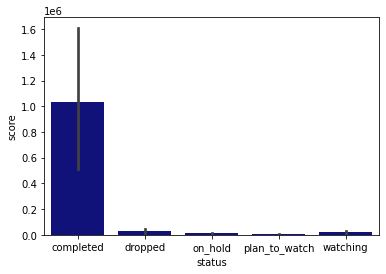

In [59]:
bar1 = sns.barplot(x="status",  y="score", data=xyz, color='darkblue')

In [44]:
statusScore

status         score
completed      8        2636291
               7        2461022
               9        1630394
               6        1292655
               10       1098224
               5         648363
               4         280830
               3         144628
               2          83142
               1          77896
dropped        5          73504
               4          57123
               6          51589
               3          33378
               1          26141
               7          25625
               2          22940
               8           8076
               9           2302
               10          1621
on_hold        7          33024
               8          24117
               6          20318
               9           9637
               5           9535
               10          6905
               4           3294
               3           1353
               2            983
               1            775
plan_to_watch  10  

In [41]:
statusScore=user.groupby('status')['score'].value_counts()

In [42]:
statusScore

status         score
completed      8        2636291
               0        2506600
               7        2461022
               9        1630394
               6        1292655
               10       1098224
               5         648363
               4         280830
               3         144628
               2          83142
               1          77896
dropped        0         471475
               5          73504
               4          57123
               6          51589
               3          33378
               1          26141
               7          25625
               2          22940
               8           8076
               9           2302
               10          1621
on_hold        0         430510
               7          33024
               8          24117
               6          20318
               9           9637
               5           9535
               10          6905
               4           3294
               3   

In [123]:
user['status'].value_counts()

completed        12860045
plan_to_watch     5835346
watching          1033725
dropped            773774
on_hold            540451
Name: status, dtype: int64

In [120]:
user[user['status']=='dropped']['score'].mean()

1.755825344351193

In [ ]:
user.shape

In [ ]:
user.count()

In [80]:
user.rename(columns={"uid":"anime_id"},inplace=True)

In [ ]:
user.status.unique()

In [ ]:
user.head()

In [97]:
anime.head()

,anime_id,title,main_picture,alternative_titles,start_date,end_date,synopsis,num_list_users,num_scoring_users,nsfw,...,status,num_episodes,start_season,source,average_episode_duration,studios,related_anime,recommendations,genres,year
0,1,Cowboy Bebop,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [], 'en': 'Cowboy Bebop', 'ja': '...",1998-04-03,1999-04-24,"Crime is timeless. By the year 2071, humanity ...",1731562,892212,white,...,finished_airing,26,"{'year': 1998, 'season': 'spring'}",original,1440,"[{'id': 14, 'name': 'Sunrise'}]","[{'anime_id': 5, 'relation': 'side_story'}, {'...","[{'anime_id': 205, 'num_recommendations': 118}...","[Action, Adult Cast, Award Winning, Sci-Fi, Sp...",1998
1,5,Cowboy Bebop: Tengoku no Tobira,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [""Cowboy Bebop: Knockin' on Heave...",2001-09-01,2001-09-01,"Another day, another bounty—such is the life o...",353984,202526,white,...,finished_airing,1,"{'year': 2001, 'season': 'summer'}",original,6911,"[{'id': 4, 'name': 'Bones'}]","[{'anime_id': 1, 'relation': 'parent_story'}]","[{'anime_id': 4106, 'num_recommendations': 3},...","[Action, Adult Cast, Sci-Fi, Space]",2001
2,6,Trigun,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': [], 'en': 'Trigun', 'ja': 'トライガン'}",1998-04-01,1998-09-30,"Vash the Stampede is the man with a $$60,000,0...",707864,347350,white,...,finished_airing,26,"{'year': 1998, 'season': 'spring'}",manga,1480,"[{'id': 11, 'name': 'Madhouse'}]","[{'anime_id': 4106, 'relation': 'side_story'},...","[{'anime_id': 1, 'num_recommendations': 85}, {...","[Action, Adult Cast, Adventure, Sci-Fi, Shounen]",1998
3,7,Witch Hunter Robin,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': ['WHR'], 'en': 'Witch Hunter Robi...",2002-07-03,2002-12-25,Robin Sena is a powerful craft user drafted in...,110305,42443,white,...,finished_airing,26,"{'year': 2002, 'season': 'summer'}",original,1500,"[{'id': 14, 'name': 'Sunrise'}]",[],"[{'anime_id': 2025, 'num_recommendations': 12}...","[Action, Detective, Drama, Mystery, Supernatural]",2002
4,8,Bouken Ou Beet,{'medium': 'https://api-cdn.myanimelist.net/im...,"{'synonyms': ['Adventure King Beet'], 'en': 'B...",2004-09-30,2005-09-29,It is the dark century and the people are suff...,14822,6353,white,...,finished_airing,52,"{'year': 2004, 'season': 'fall'}",manga,1380,"[{'id': 18, 'name': 'Toei Animation'}]","[{'anime_id': 1123, 'relation': 'sequel'}]","[{'anime_id': 417, 'num_recommendations': 2}, ...","[Adventure, Fantasy, Shounen, Supernatural]",2004


In [98]:
anime.columns

Index(['anime_id', 'title', 'main_picture', 'alternative_titles', 'start_date',
       'end_date', 'synopsis', 'num_list_users', 'num_scoring_users', 'nsfw',
       'medium', 'status', 'num_episodes', 'start_season', 'source',
       'average_episode_duration', 'studios', 'related_anime',
       'recommendations', 'genres', 'year'],
      dtype='object')

In [ ]:
anime.count()

In [5]:
anime['genres']= anime['genres'].apply(lambda x: eval(x))

In [6]:
a_genres=anime.explode('genres')

In [7]:
anime_genres=a_genres.groupby('genres').count()['anime_id'].sort_values(ascending=False)[:20]

In [105]:
type_count = anime['medium'].value_counts()

In [106]:
type_count

tv         3522
movie      2094
ova        1938
ona        1476
special    1190
music      1059
unknown      20
Name: medium, dtype: int64

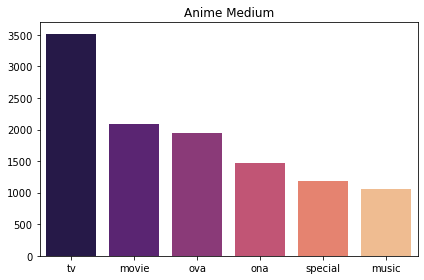

In [107]:
type_count = anime['medium'].value_counts()[:6]
plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index,
            y=type_count.values,
            palette='magma').set_title('Anime Medium')
plt.title('Medium ')
plt.tight_layout()
plt.show()

In [ ]:
type_count = anime['source'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='magma').set_title('Anime Medium')
plt.title('')
plt.tight_layout()
plt.show()

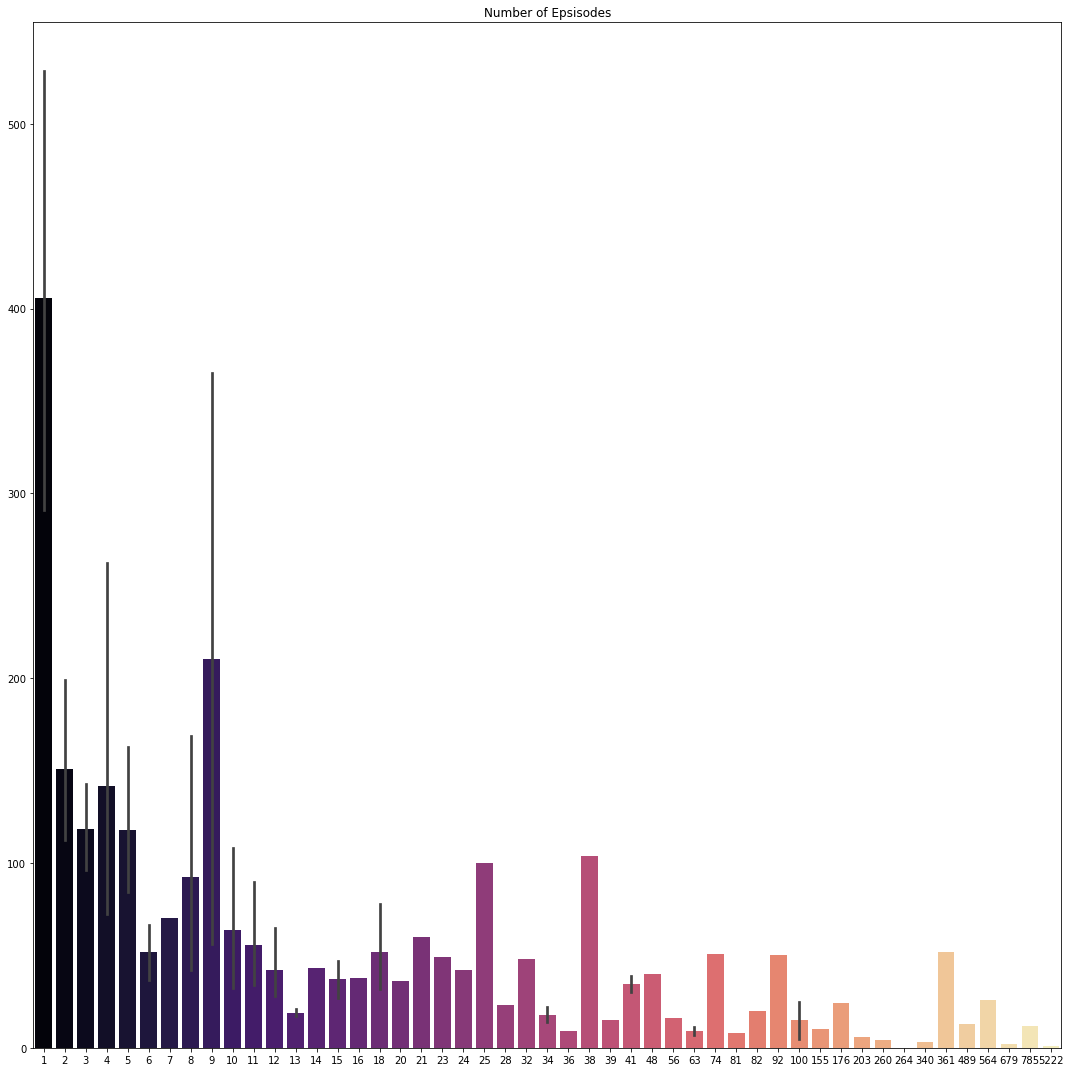

In [110]:
type_count = anime['num_episodes'].value_counts()
plt.figure(figsize=(15,15))
sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='magma').set_title('Number of Epsisodes')
plt.tight_layout()
plt.show()

In [ ]:
anime['year']=anime['start_date'].

In [12]:
source_count=anime['source'].value_counts()[:8]
source_count

original        4159
manga           2324
game             521
visual_novel     481
other            473
light_novel      421
novel            347
web_manga        171
Name: source, dtype: int64

In [20]:
source_count

original        4159
manga           2324
game             521
visual_novel     481
other            493
light_novel      421
novel            347
web_manga        171
4_koma_manga     158
music            154
book              93
picture_book      85
mixed_media       53
card_game         33
web_novel         29
radio              7
Name: source, dtype: int64

#Top Sources

In [21]:
source_count = anime['source'].value_counts()
source_count['other']+=type_count[type_count.values<300].sum()
TopSources=source_count[source_count.values>300]
TopSources

original        4159
manga           2324
game             521
visual_novel     481
other            493
light_novel      421
novel            347
Name: source, dtype: int64

In [109]:
import plotly.graph_objects as go
labels = TopSources.index
values = TopSources.values

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Source",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

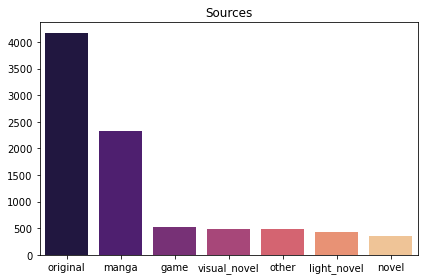

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x=TopSources.index,
            y=TopSources.values,
            palette='magma').set_title('Sources')
plt.tight_layout()
plt.show()

Year

In [24]:
anime['year']=anime.start_date.str.split("-", expand = True)[0]

In [25]:
anime.start_date.str.split("-", expand = True)[0]

0        1998
1        2001
2        1998
3        2002
4        2004
         ... 
11294     NaN
11295    2004
11296    2023
11297    2023
11298    2005
Name: 0, Length: 11299, dtype: object

In [26]:
year_series = pd.Series(anime['year']).dropna()
year_series=year_series.astype(int)
year_counts = year_series.groupby(year_series).size()

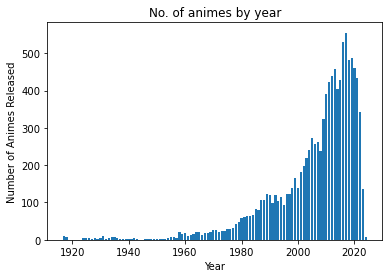

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Animes Released')
plt.title('No. of animes by year')
plt.show()